<a href="https://colab.research.google.com/github/Rx4M00N/IA_Tarea1/blob/main/Modelo_Regresi%C3%B3n_VIT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Implementación Modelo VIT
Regresión para obtener calidad en muestras de vino tinto.

Elaborado por: Joshua Corvera y Ricardo Luna.

MT-8008 Inteligencia Artificial, grupo 1, II Semestre 2022.

##Importación de librerías

In [ ]:
# Importación de librerías
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Normalization
from tensorflow.keras.optimizers import Adam, SGD
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

##Carga de datos a partir de archivo .csv

In [ ]:
#Se cargan los datos desde un .csv
datos_vinotinto = pd.read_csv('winequality-red.csv', header=0)
#Se revisa el arreglo cargado y se elimiman datos nulos
datos_vinotinto = datos_vinotinto.dropna()
#Muestra el arreglo cargado en pantalla
print(datos_vinotinto)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

##Formato de los datos y separación en subconjuntos

In [ ]:
# =============== Dar formato a los datos de entrenamiento ===============
#Se define un porcentaje de los datos que se usará para entrenar.
#En este caso se usan 80% de los datos para entrenamiento y validación, y 20%
#para pruebas
p_train = 0.80
#Se seleccionan datos al azar, mediante la asignación temporal de flags
datos_vinotinto['is_train'] = np.random.uniform(0, 1, len(datos_vinotinto)) <= p_train
#Se dividen los datos en subconjuntos, según los flags asginados
train, test = datos_vinotinto[datos_vinotinto['is_train']==True], datos_vinotinto[datos_vinotinto['is_train']==False]
#Se eliminan los flags del conjunto original
datos_vinotinto = datos_vinotinto.drop('is_train', 1)
#Se imprimen las cantidades de datos de entrenamiento y de prueba
print("Ejemplos usados para entrenar: ", len(train))
print("Ejemplos usados para test: ", len(test))
#Se eliminan los flags temporales de los subconjuntos de prueba y entrenamiento
train.pop('is_train')
test.pop('is_train')
#Se separan las etiquetas de las entradas, para cada subconjunto de datos
train_labels = train.pop('quality')
train_data = train
test_labels = test.pop('quality')
test_data = test

Ejemplos usados para entrenar:  1274
Ejemplos usados para test:  325


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  # This is added back by InteractiveShellApp.init_path()


##Normalización de datos 

In [ ]:
#Se crea un objeto tipo scaler, que se encargará de normalizar los datos de cada
#subconjunto
scaler = StandardScaler()
#Se normalizan los subconjuntos de entrenamiento y prueba 
normed_train_data = scaler.fit_transform(train_data)
normed_test_data = scaler.fit_transform(test_data)

##Creación y compilación del modelo

In [ ]:
#Se define una función para facilitar la creación de la red densa
def build_model():
  #A continuación se crea el modelo para la red, definiendo un valor para las
  #entradas con el parámetro input_shape=[len(train_data.keys())], y luego
  #se agregan capas de neuronas a la red, con la cantidad definida de neuronas
  #por capa y la función de activación sigmoide. Por último, se cuenta con una
  #única neurona de salida
  model = Sequential([
    Dense(32, activation='sigmoid', input_shape=[len(train_data.keys())]),
    Dense(32, activation='sigmoid'),
    #Dense(16, activation='sigmoid'),
    Dense(1)
  ])

  #Se define el optimizador para implementar con la red, así como su tasa de
  #aprendizaje y valor de momentum
  optimizer = Adam(learning_rate=0.001, beta_1=0.9)

  #Se compila el modelo definido, con la función de pérdida tipo Huber y usando
  #los errores MAE y MSE como métricas, así como el optimizador definido
  model.compile(loss='huber',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  #Finaliza el llamado a la función mediante el retorno del modelo
  return model
#Se crea el modelo de la red, haciendo un llamado a la función anterior
model = build_model()
#Con el fin de verificar la creación adecuada del modelo, se muestra un resumen
#de este último
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 32)                384       
                                                                 
 dense_4 (Dense)             (None, 32)                1056      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,473
Trainable params: 1,473
Non-trainable params: 0
_________________________________________________________________


##Entrenamiento

In [ ]:
#Se define el número de iteraciones para realizar el entrenamiento
EPOCHS = 1000
#Asimismo, se calcula la cantidad y frecuencia de las validaciones, según las
#iteraciones realizadas
CantVal = int(EPOCHS * 0.1)
freqVal = int(EPOCHS / CantVal)
#Se entrena a la red neuronal, usando el subconjunto de datos de entrenamiento
#Además se define que un 20% de este conjunto se utilizará para validación
#El inicio del entrenamiento se indica mediante un mensaje en pantalla
print("Realizando entrenamiento...")
history = model.fit(
  normed_train_data, train_labels.to_numpy(),
  epochs=EPOCHS, validation_split = 0.2, validation_freq=freqVal, verbose=1)
#Se indica el final del entrenamiento
print("Fin del entrenamiento")

Realizando entrenamiento...
Epoch 1/1000
32/32 [==============================] - 1s 2ms/step - loss: 4.5179 - mae: 5.0179 - mse: 25.9853
Epoch 2/1000
32/32 [==============================] - 0s 2ms/step - loss: 3.3096 - mae: 3.8095 - mse: 15.2925
Epoch 3/1000
32/32 [==============================] - 0s 2ms/step - loss: 2.1212 - mae: 2.6183 - mse: 7.6094
Epoch 4/1000
32/32 [==============================] - 0s 2ms/step - loss: 1.0520 - mae: 1.5224 - mse: 2.9900
Epoch 5/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.4462 - mae: 0.7906 - mse: 1.0789
Epoch 6/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.2891 - mae: 0.6689 - mse: 0.6462
Epoch 7/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.2644 - mae: 0.6331 - mse: 0.5789
Epoch 8/1000
32/32 [==============================] - 0s 3ms/step - loss: 0.2525 - mae: 0.6086 - mse: 0.5502
Epoch 9/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.2434 - mae: 0.5876 - m

##Gráficas de errores absoluto y cuadrático promedios

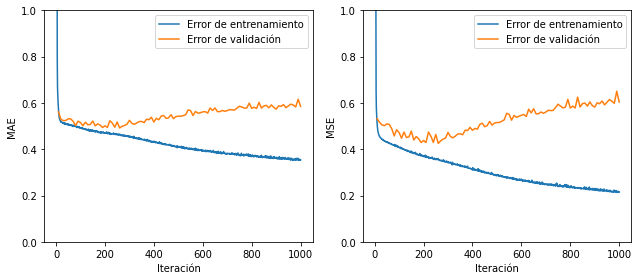

In [ ]:
# ================ Gráficas de MAE y MSE ================
#Luego del entrenamiento, se obtienen los datos de pérdida para el entrenamiento
#y la validación
mae = history.history['mae']
val_mae = history.history['val_mae']
mse = history.history['mse']
val_mse = history.history['val_mse']
#Se crean arrays para definir los ejes horizontales de las pérdidas anteriores
#en la gráfica
x_mae = []
x_mse = []
x_valmae = []
x_valmse = []
#Se agregan los valores a cada eje x del entrenamiento, que corresponden a cada
#iteración
for i in range(EPOCHS):
  x_mae.append(i + 1)
  x_mse.append(i + 1)
#Se agregan los valores a cada eje x de validación, de acuerdo con la frecuencia 
#de validación definida anteriormente
for i in range(CantVal):
  x_valmae.append((i + 1) * freqVal)
  x_valmse.append((i + 1) * freqVal)
#Para graficar de mejor forma los resultados, se usa un subplot con 2 espacios
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))
#Se configuran los nombres de cada eje en las gráficas
axs[0].set_xlabel("Iteración")
axs[0].set_ylabel("MAE")
axs[1].set_xlabel("Iteración")
axs[1].set_ylabel("MSE")
#Se grafican los datos de error absoluto para el entrenamiento y la validación
axs[0].plot(x_mae, mae, label="Error de entrenamiento")
axs[0].plot(x_valmae, val_mae, label="Error de validación")
#Se grafican los datos de error cuadrático para el entrenamiento y la validación
axs[1].plot(x_mse, mse, label="Error de entrenamiento")
axs[1].plot(x_valmse, val_mse, label="Error de validación")
#Limita los ejes de las gráficas a valores entre 0 y 1, para observar cada error
axs[0].set_ylim([0,1])
axs[1].set_ylim([0,1])
#Muestra las leyendas para identificar las curvas
axs[0].legend()
axs[1].legend()
#Despliega las gráficas resultantes
fig.tight_layout()
plt.show()

##Evaluación de pruebas

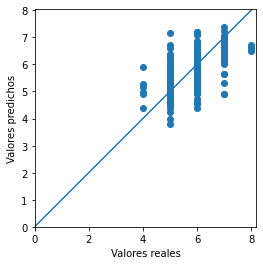

In [ ]:
#Para evaluar completamente el funcionamiento del modelo, se realiza una serie
#de predicciones usando el subconjunto de prueba que se definió anteriormente
test_predictions = model.predict(normed_test_data).flatten()
#Para observar cuánto distan los valores predichos de los valores reales, se
#realiza una gráfica de dispersión entre dichos datos
plt.scatter(test_labels, test_predictions)
#Se colocan los nombres de los ejes
plt.xlabel('Valores reales')
plt.ylabel('Valores predichos')
#Se definen las dimensiones de la gráfica
plt.axis('equal')
plt.axis('square')
#Se establecen límites para cada uno de los ejes, de modo que se aproveche el
#espacio lo más que se pueda
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
#Se dibuja la recta ideal en la cual se encontrarían los datos, si el error de
#la red fuera cero
_ = plt.plot([-100, 100], [-100, 100])

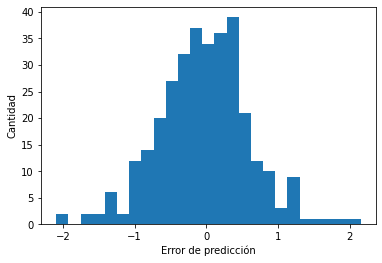

In [ ]:
#En adición a lo anterior, se realiza un histograma en donde se indica la
#cantidad de veces que sucedió cada posible error en la predicción
#Para ello, se calcula el error de predicción, al sustraer los valores reales
#de los valores predichos
error = test_predictions - test_labels
#Se grafica el histograma correctamente
plt.hist(error, bins = 25)
plt.xlabel("Error de predicción")
_ = plt.ylabel("Cantidad")

##Carga de combinaciones adicionales de entrada

In [ ]:
# ================ Carga de datos externos ================
#Primero se cargan los datos a partir de un nuevo archivo .csv
data_redwine = pd.read_csv('winequality-red1.csv', header=0)
print(data_redwine)
#Como estos datos solo incluyen los parámetros de entrada, se procede a su
#normalización
normed_data_redwine = scaler.fit_transform(data_redwine)
#Luego, se calculan las calidades de vino
qual_preds = model.predict(normed_data_redwine).flatten()
print("\nQualities:",qual_preds)

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            6.3              0.56         0.18             5.3        177   
1            9.9              0.26         0.02             6.9         24   
2            5.9              0.77         0.12             7.2        112   

   free sulfur dioxide  total sulfur dioxide  density   pH  sulphates  alcohol  
0                   17                    23   0.8933  8.2       0.91     11.7  
1                   17                    51   0.8733  2.3       0.67      9.2  
2                    9                    67   0.8841  6.5       1.17     14.5  

Qualities: [6.126431 5.441194 5.702664]
